# Task: Predict the genetic disorders

Given a dataset that contains medical information of children who have genetic disorders. Predict the genetic disorder.

In [101]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

## 1. Data load

In [102]:
train_data = pd.read_csv(r"train_genetic_disorders.csv")
test_data=pd.read_csv(r"test_genetic_disorders.csv")
df_train=train_data.copy()
df_test=test_data.copy()

In [103]:
df_train.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [104]:
df_train.tail()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
22078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        21011 non-null  object 
 1   Patient Age                                       19643 non-null  float64
 2   Genes in mother's side                            21011 non-null  object 
 3   Inherited from father                             20724 non-null  object 
 4   Maternal gene                                     18317 non-null  object 
 5   Paternal gene                                     21011 non-null  object 
 6   Blood cell count (mcL)                            21011 non-null  float64
 7   Patient First Name                                21011 non-null  object 
 8   Family Name                                       11771 non-null  object 
 9   Father's name    

In [106]:
df_train.drop([
         "Patient Id",
          "Patient First Name",
          "Family Name",
          "Father's name",
          "Institute Name",
          "Location of Institute",
          "Test 1",
          "Test 2",
          "Test 3",
          "Test 4",
          "Test 5",
          "Symptom 1",
          "Symptom 2",
          "Symptom 3",
          "Symptom 4",
          "Symptom 5",
          "Parental consent",
    ], axis=1, inplace=True)

In [107]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       19643 non-null  float64
 1   Genes in mother's side                            21011 non-null  object 
 2   Inherited from father                             20724 non-null  object 
 3   Maternal gene                                     18317 non-null  object 
 4   Paternal gene                                     21011 non-null  object 
 5   Blood cell count (mcL)                            21011 non-null  float64
 6   Mother's age                                      15293 non-null  float64
 7   Father's age                                      15322 non-null  float64
 8   Status                                            21011 non-null  object 
 9   Respiratory Rate 

In [108]:
df_train.duplicated().count()

np.int64(22083)

In [109]:
df_train.shape

(22083, 28)

In [110]:
df_train.isnull().sum()

Patient Age                                         2440
Genes in mother's side                              1072
Inherited from father                               1359
Maternal gene                                       3766
Paternal gene                                       1072
Blood cell count (mcL)                              1072
Mother's age                                        6790
Father's age                                        6761
Status                                              1072
Respiratory Rate (breaths/min)                      3131
Heart Rate (rates/min                               3097
Follow-up                                           3142
Gender                                              3135
Birth asphyxia                                      3130
Autopsy shows birth defect (if applicable)          5236
Place of birth                                      3090
Folic acid details (peri-conceptional)              3085
H/O serious maternal illness   

In [111]:
missing_percentage = (df_train.isnull().sum() / len(df_train)) * 100
print(missing_percentage)

Patient Age                                         11.049223
Genes in mother's side                               4.854413
Inherited from father                                6.154055
Maternal gene                                       17.053842
Paternal gene                                        4.854413
Blood cell count (mcL)                               4.854413
Mother's age                                        30.747634
Father's age                                        30.616311
Status                                               4.854413
Respiratory Rate (breaths/min)                      14.178327
Heart Rate (rates/min                               14.024363
Follow-up                                           14.228139
Gender                                              14.196441
Birth asphyxia                                      14.173799
Autopsy shows birth defect (if applicable)          23.710547
Place of birth                                      13.992664
Folic ac

In [112]:
for col in df_train.select_dtypes(include=["object"]):
    print(f"{df_train[col].value_counts()}\n")

Genes in mother's side
Yes    12509
No      8502
Name: count, dtype: int64

Inherited from father
No     12508
Yes     8216
Name: count, dtype: int64

Maternal gene
Yes    10125
No      8192
Name: count, dtype: int64

Paternal gene
No     11887
Yes     9124
Name: count, dtype: int64

Status
Alive       10572
Deceased    10439
Name: count, dtype: int64

Respiratory Rate (breaths/min)
Normal (30-60)    9595
Tachypnea         9357
Name: count, dtype: int64

Heart Rate (rates/min
Normal         9715
Tachycardia    9271
Name: count, dtype: int64

Follow-up
Low     9564
High    9377
Name: count, dtype: int64

Gender
Ambiguous    6385
Male         6321
Female       6242
Name: count, dtype: int64

Birth asphyxia
Yes              4839
Not available    4755
No record        4752
No               4607
Name: count, dtype: int64

Autopsy shows birth defect (if applicable)
Not applicable    10572
Yes                3217
No                 3058
Name: count, dtype: int64

Place of birth
Institute    9

In [113]:
df_train["Birth asphyxia"] = df_train["Birth asphyxia"].replace("No record",np.nan)
df_train["Birth asphyxia"] = df_train["Birth asphyxia"].replace("Not available",np.nan)
df_train["H/O substance abuse"] = df_train["H/O substance abuse"].replace("Not applicable",np.nan)
df_train["H/O substance abuse"] = df_train["H/O substance abuse"].replace("-",np.nan)
df_train["H/O radiation exposure (x-ray)"] = df_train["H/O radiation exposure (x-ray)"].replace("-",np.nan)
df_train["H/O radiation exposure (x-ray)"] = df_train["H/O radiation exposure (x-ray)"].replace("Not applicable",np.nan)


# 2 Data Preprocessing

In [114]:
numerical_cols = df_train.select_dtypes(include=["number"]).columns
numerical_cols

Index(['Patient Age', 'Blood cell count (mcL)', 'Mother's age', 'Father's age',
       'No. of previous abortion',
       'White Blood cell count (thousand per microliter)'],
      dtype='object')

In [115]:
columns_to_convert = [
    'Genes in mother\'s side',                # Yes/No
    'Inherited from father',                  # Yes/No
    'Maternal gene',                          # Yes/No
    'Status',                                 # Alive/Deceased is categorical
    'Respiratory Rate (breaths/min)',         # Discrete categories (Normal/Tachypnea)
    'Heart Rate (rates/min',                 # Discrete categories (Normal/Tachycardia)
    'Follow-up',                              # Low/High is categorical
    'Gender',                                 # Male/Female/Ambiguous
    'Birth asphyxia',                         # Yes/No/Not available
    'Autopsy shows birth defect (if applicable)', # Yes/No/Not applicable
    'Place of birth',                         # Institute/Home
    'Folic acid details (peri-conceptional)', # Yes/No
    'H/O serious maternal illness',           # Yes/No
    'H/O radiation exposure (x-ray)',         # Yes/No/Not applicable
    'H/O substance abuse',                    # Yes/No/Not applicable
    'Assisted conception IVF/ART',            # Yes/No
    'History of anomalies in previous pregnancies', # Yes/No
    'Birth defects',                          # Singular/Multiple
    'Blood test result',                      # Slightly abnormal, normal, abnormal, etc.
    'Genetic Disorder',                       # Types of genetic disorders (categorical)
    'Disorder Subclass'                       # Subtypes of disorders (categorical)
]

df_train[columns_to_convert] = df_train[columns_to_convert].astype('category')

In [116]:
categorical_cols = df_train.select_dtypes(include=["category"]).columns
categorical_cols

Index(['Genes in mother's side', 'Inherited from father', 'Maternal gene',
       'Status', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
       'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Birth defects',
       'Blood test result', 'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

In [117]:
categorical_cols.shape

(21,)

In [118]:
for col in df_train.select_dtypes(include=["category"]):
    print(f"{df_train[col].value_counts()}\n")
    

Genes in mother's side
Yes    12509
No      8502
Name: count, dtype: int64

Inherited from father
No     12508
Yes     8216
Name: count, dtype: int64

Maternal gene
Yes    10125
No      8192
Name: count, dtype: int64

Status
Alive       10572
Deceased    10439
Name: count, dtype: int64

Respiratory Rate (breaths/min)
Normal (30-60)    9595
Tachypnea         9357
Name: count, dtype: int64

Heart Rate (rates/min
Normal         9715
Tachycardia    9271
Name: count, dtype: int64

Follow-up
Low     9564
High    9377
Name: count, dtype: int64

Gender
Ambiguous    6385
Male         6321
Female       6242
Name: count, dtype: int64

Birth asphyxia
Yes    4839
No     4607
Name: count, dtype: int64

Autopsy shows birth defect (if applicable)
Not applicable    10572
Yes                3217
No                 3058
Name: count, dtype: int64

Place of birth
Institute    9591
Home         9402
Name: count, dtype: int64

Folic acid details (peri-conceptional)
Yes    9625
No     9373
Name: count, dtype:

In [119]:
sizes = [
    (col, df_train[col].nunique())  # Use nunique() to count distinct values
    for col in df_train.select_dtypes(include=["category"])
]

# Sort by the number of unique values in descending order
sizes_sorted = sorted(sizes, key=lambda x: x[1], reverse=True)

# Print the values in the desired format
print("/".join(str(i[1]) for i in sizes_sorted))


9/4/3/3/3/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2


In [120]:
df_train.select_dtypes(include=["category"]).describe

<bound method NDFrame.describe of       Genes in mother's side Inherited from father Maternal gene    Status  \
0                        Yes                    No           Yes     Alive   
1                        Yes                   Yes            No  Deceased   
2                        Yes                    No            No     Alive   
3                        Yes                    No           Yes  Deceased   
4                        Yes                    No           NaN     Alive   
...                      ...                   ...           ...       ...   
22078                    NaN                   NaN           NaN       NaN   
22079                    NaN                   NaN           NaN       NaN   
22080                    NaN                   NaN           NaN       NaN   
22081                    NaN                   NaN           NaN       NaN   
22082                    NaN                   NaN           NaN       NaN   

      Respiratory Rate (breat

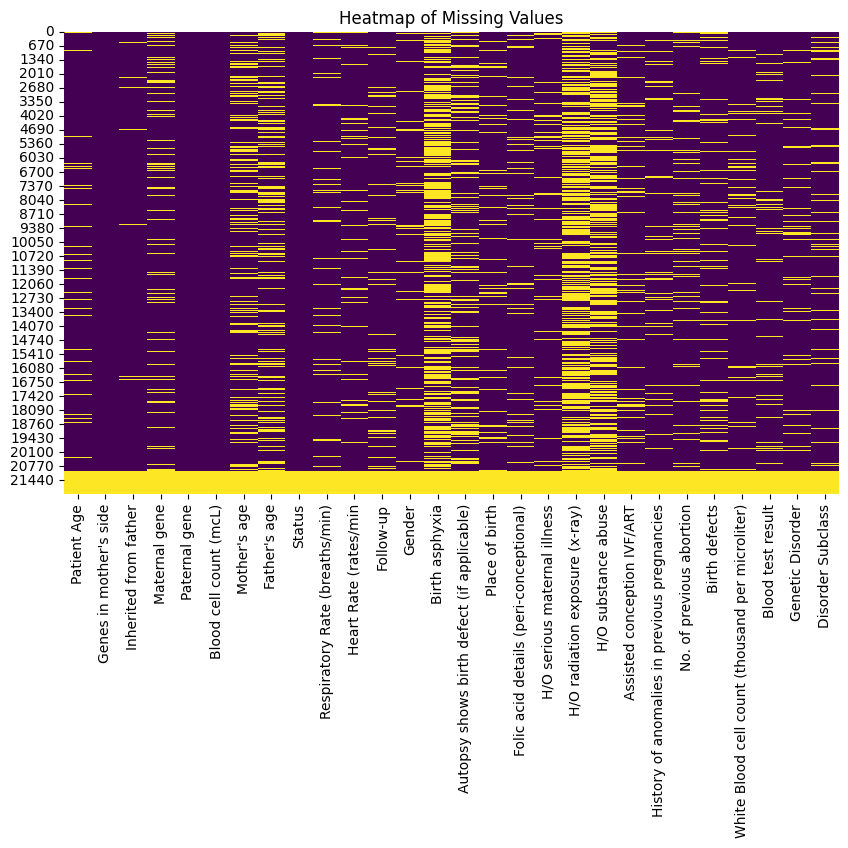

In [121]:
# Create a heatmap to visualize null values
plt.figure(figsize=(10,6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [122]:
missing_percentage = ((df_train.isnull().sum() / len(df_train))*100)
print(missing_percentage.values.mean())

df_train.isnull().mean()

18.627127525375045


Patient Age                                         0.110492
Genes in mother's side                              0.048544
Inherited from father                               0.061541
Maternal gene                                       0.170538
Paternal gene                                       0.048544
Blood cell count (mcL)                              0.048544
Mother's age                                        0.307476
Father's age                                        0.306163
Status                                              0.048544
Respiratory Rate (breaths/min)                      0.141783
Heart Rate (rates/min                               0.140244
Follow-up                                           0.142281
Gender                                              0.141964
Birth asphyxia                                      0.572250
Autopsy shows birth defect (if applicable)          0.237105
Place of birth                                      0.139927
Folic acid details (peri

**Mean, Spread, Correlation Matrix**

In [123]:
df_train[numerical_cols].mean()

Patient Age                                          6.974851
Blood cell count (mcL)                               4.899004
Mother's age                                        34.522527
Father's age                                        41.942436
No. of previous abortion                             2.000106
White Blood cell count (thousand per microliter)     7.484680
dtype: float64

In [124]:
df_train[numerical_cols].std()

Patient Age                                          4.322584
Blood cell count (mcL)                               0.199829
Mother's age                                         9.847256
Father's age                                        13.027701
No. of previous abortion                             1.411488
White Blood cell count (thousand per microliter)     2.653633
dtype: float64

**Corellation matrix**

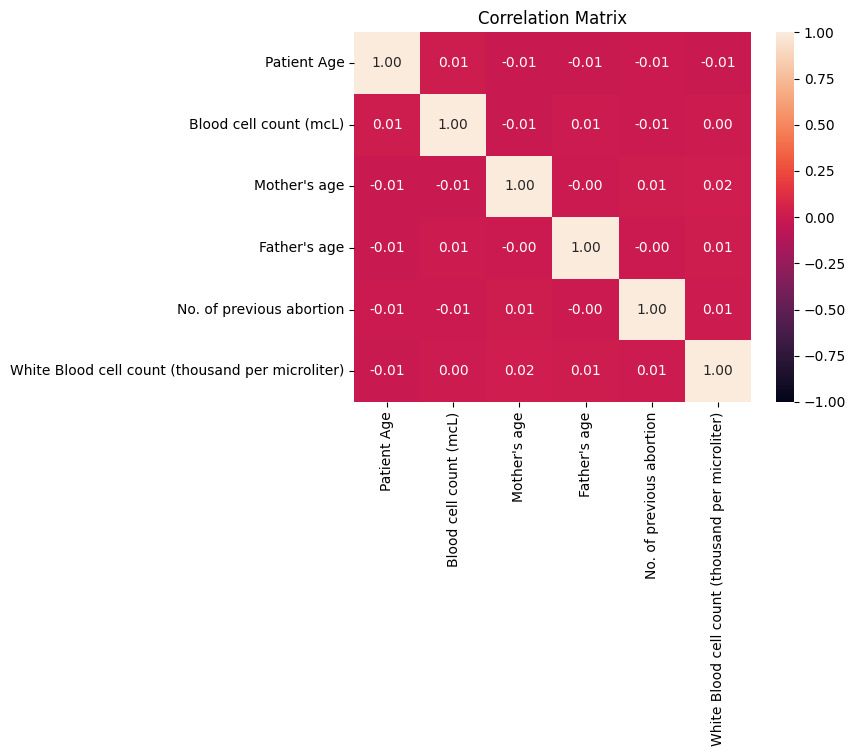

In [125]:
corr_matrix = df_train[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


Corellation is very small

# 3. Normalisation

In [126]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform on training data, and transform test data
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

# Check the standardized data
print(df_train[numerical_cols].describe())

        Patient Age  Blood cell count (mcL)  Mother's age  Father's age  \
count  1.964300e+04            2.101100e+04  1.529300e+04  1.532200e+04   
mean  -4.792899e-17            2.846094e-15  3.363846e-16  3.292555e-17   
std    1.000025e+00            1.000024e+00  1.000033e+00  1.000033e+00   
min   -1.613625e+00           -4.034936e+00 -1.677936e+00 -1.684346e+00   
25%   -9.195777e-01           -6.794681e-01 -8.655005e-01 -8.399635e-01   
50%    5.818174e-03            2.722260e-03  4.848955e-02  4.418751e-03   
75%    9.312141e-01            6.754583e-01  8.609252e-01  8.488010e-01   
max    1.625261e+00            3.557252e+00  1.673361e+00  1.693183e+00   

       No. of previous abortion  \
count              1.895700e+04   
mean              -1.649200e-17   
std                1.000026e+00   
min               -1.417057e+00   
25%               -7.085657e-01   
50%               -7.474716e-05   
75%                7.084162e-01   
max                1.416907e+00   

       W

# Classification

In [127]:
df_train.info()
df_train.describe()
df_train.describe(include="object")
print("Duplicate rows count:", df_train.duplicated().sum())
print("Shape of training data:", df_train.shape)
print("Missing values in each column:\n", df_train.isnull().sum())
missing_percentage = (df_train.isnull().sum() / len(df_train)) * 100
print("Missing percentage:\n", missing_percentage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Patient Age                                       19643 non-null  float64 
 1   Genes in mother's side                            21011 non-null  category
 2   Inherited from father                             20724 non-null  category
 3   Maternal gene                                     18317 non-null  category
 4   Paternal gene                                     21011 non-null  object  
 5   Blood cell count (mcL)                            21011 non-null  float64 
 6   Mother's age                                      15293 non-null  float64 
 7   Father's age                                      15322 non-null  float64 
 8   Status                                            21011 non-null  category
 9   Respir

In [128]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for normalization
numerical_cols = df_train.select_dtypes(include=["number"]).columns

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform the data
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])  # Transform test data using the same scaler

# Check the scaled data
print(df_train[numerical_cols].describe())

        Patient Age  Blood cell count (mcL)  Mother's age  Father's age  \
count  19643.000000            21011.000000  15293.000000  15322.000000   
mean       0.498204                0.531459      0.500683      0.498692   
std        0.308756                0.131717      0.298402      0.296084   
min        0.000000                0.000000      0.000000      0.000000   
25%        0.214286                0.441963      0.242424      0.250000   
50%        0.500000                0.531817      0.515152      0.500000   
75%        0.785714                0.620426      0.757576      0.750000   
max        1.000000                1.000000      1.000000      1.000000   

       No. of previous abortion  \
count              18957.000000   
mean                   0.500026   
std                    0.352872   
min                    0.000000   
25%                    0.250000   
50%                    0.500000   
75%                    0.750000   
max                    1.000000   

       W

In [129]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform on training data, and transform test data
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

# Check the standardized data
print(df_train[numerical_cols].describe())

        Patient Age  Blood cell count (mcL)  Mother's age  Father's age  \
count  1.964300e+04            2.101100e+04  1.529300e+04  1.532200e+04   
mean  -9.929440e-17            3.192387e-16 -6.504674e-18 -1.465419e-16   
std    1.000025e+00            1.000024e+00  1.000033e+00  1.000033e+00   
min   -1.613625e+00           -4.034936e+00 -1.677936e+00 -1.684346e+00   
25%   -9.195777e-01           -6.794681e-01 -8.655005e-01 -8.399635e-01   
50%    5.818174e-03            2.722260e-03  4.848955e-02  4.418751e-03   
75%    9.312141e-01            6.754583e-01  8.609252e-01  8.488010e-01   
max    1.625261e+00            3.557252e+00  1.673361e+00  1.693183e+00   

       No. of previous abortion  \
count              1.895700e+04   
mean              -1.649200e-17   
std                1.000026e+00   
min               -1.417057e+00   
25%               -7.085657e-01   
50%               -7.474716e-05   
75%                7.084162e-01   
max                1.416907e+00   

       W

In [32]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform on training data, and transform test data
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

# Check the standardized data
print(df_train[numerical_cols].describe())


        Patient Age  Blood cell count (mcL)  Mother's age  Father's age  \
count  1.964300e+04            2.101100e+04  1.529300e+04  1.532200e+04   
mean   3.128949e-17           -1.961424e-17 -2.230174e-17 -3.709922e-17   
std    1.000025e+00            1.000024e+00  1.000033e+00  1.000033e+00   
min   -1.613625e+00           -4.034936e+00 -1.677936e+00 -1.684346e+00   
25%   -9.195777e-01           -6.794681e-01 -8.655005e-01 -8.399635e-01   
50%    5.818174e-03            2.722260e-03  4.848955e-02  4.418751e-03   
75%    9.312141e-01            6.754583e-01  8.609252e-01  8.488010e-01   
max    1.625261e+00            3.557252e+00  1.673361e+00  1.693183e+00   

        Test 1   Test 2   Test 3   Test 4   Test 5  No. of previous abortion  \
count  18992.0  18958.0  18970.0  18962.0  18939.0              1.895700e+04   
mean       0.0      0.0      0.0      0.0      0.0             -1.649200e-17   
std        0.0      0.0      0.0      0.0      0.0              1.000026e+00   
min 

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Label encode target column (assuming "Genetic Disorder" is the target)
target_column = 'Genetic Disorder'
label_encoder = LabelEncoder()
df_train[target_column] = label_encoder.fit_transform(df_train[target_column])

# Separate features and target
X = df_train.drop(columns=[target_column])
y = df_train[target_column]

# Handle missing values
X = X.fillna(X.median(numeric_only=True))  # Impute numerical columns with median
# X = X.fillna("Unknown")  # For categorical columns, use a placeholder value

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



## Initialize and train the KNeighborsClassifier and RandomForest Classifier

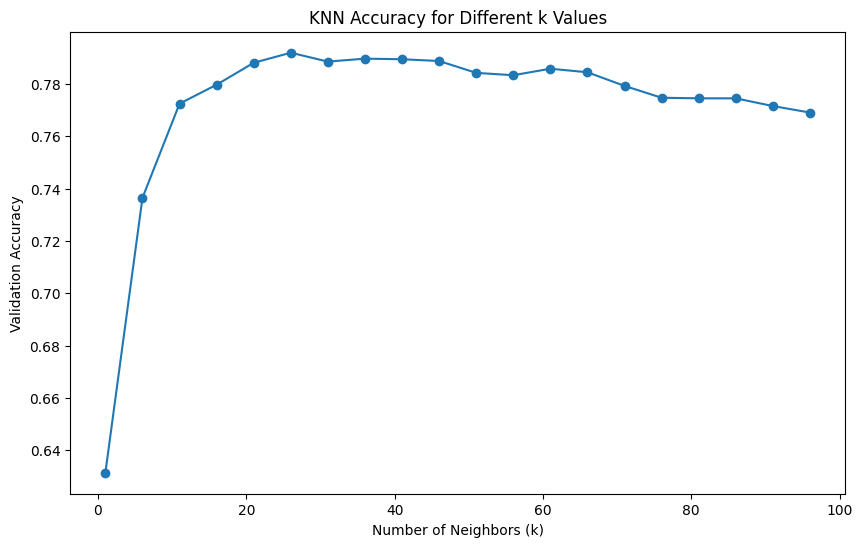

Best k: 26
KNN Classifier with best k
Accuracy: 0.7919402309259679
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.97      0.84      1956
           1       0.92      0.41      0.57       420
           2       0.84      0.85      0.85      1420
           3       0.91      0.35      0.50       621

    accuracy                           0.79      4417
   macro avg       0.86      0.64      0.69      4417
weighted avg       0.82      0.79      0.77      4417

Confusion Matrix:
 [[1903    0   44    9]
 [ 198  172   46    4]
 [ 204    0 1208    8]
 [ 253   14  139  215]]

Random Forest Classifier
Accuracy: 0.8652931854199684
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90      1956
           1       0.92      0.89      0.91       420
           2       0.88      0.93      0.90      1420
           3       1.00      0.34      0.51       621

    accurac

In [140]:
# Imports for metrics and models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Loop through a range of k values to find the optimal k for KNN
k_values = range(1, 101, 5)  # test k values from 1 to 100 with step 5
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)

# Plotting accuracy against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.show()

# Best k value based on maximum accuracy
best_k = k_values[accuracies.index(max(accuracies))]
print("Best k:", best_k)

# Train final KNN model with the best k and evaluate
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_knn_pred = best_knn.predict(X_val)

print("KNN Classifier with best k")
print("Accuracy:", accuracy_score(y_val, y_knn_pred))
print("Classification Report:\n", classification_report(y_val, y_knn_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_knn_pred))

# Initialize and train the RandomForest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_rf_pred = rf_classifier.predict(X_val)

print("\nRandom Forest Classifier")
print("Accuracy:", accuracy_score(y_val, y_rf_pred))
print("Classification Report:\n", classification_report(y_val, y_rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_rf_pred))

# Comparison of both models based on accuracy
print("\nComparison of KNN and Random Forest Accuracies:")
print(f"KNN Accuracy (k={best_k}):", accuracy_score(y_val, y_knn_pred))
print("Random Forest Accuracy:", accuracy_score(y_val, y_rf_pred))


Random Forest Accuracy is better on out data

## A 3-layer neural network is created with ReLU activation functions

Epoch 1/100


/home/usr1/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


277/277 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1769 - loss: -0.0372 - val_accuracy: 0.1607 - val_loss: -3.7570 - learning_rate: 5.0000e-04
Epoch 2/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2819 - loss: -17.0230 - val_accuracy: 0.4288 - val_loss: -89.5493 - learning_rate: 5.0000e-04
Epoch 3/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3307 - loss: -117.1943 - val_accuracy: 0.4213 - val_loss: -270.4801 - learning_rate: 5.0000e-04
Epoch 4/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2410 - loss: -319.6388 - val_accuracy: 0.0953 - val_loss: -547.2098 - learning_rate: 5.0000e-04
Epoch 5/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1791 - loss: -661.2686 - val_accuracy: 0.0951 - val_loss: -977.7302 - learning_rate: 5.0000e-04
Epoch 6/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1819 - loss: -1129.8916 - val_accuracy: 0.0951 - val_loss: -1597.8856 - learning_rate: 5.0000e-04
Epoch 7/100
277/277 ━━━━━━━━━━━━━━━━━━

/home/usr1/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/usr1/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/usr1/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


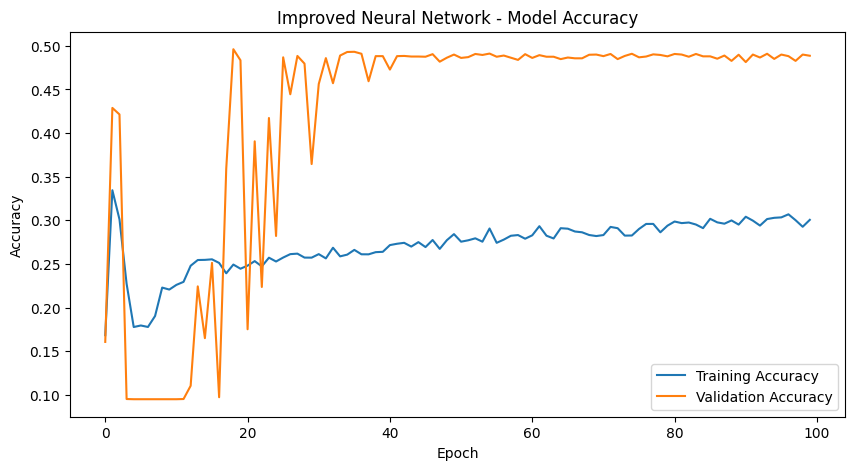


Comparison of Model Accuracies:
KNN Accuracy (k=26): 0.7919402309259679
Random Forest Accuracy: 0.8652931854199684
Improved Neural Network Accuracy: 0.4885669006112746


In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Neural Network Model - Improved
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Change for binary or multiclass classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for dynamic learning rate and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), 
                    callbacks=[reduce_lr, early_stopping], verbose=1)

# Predict and evaluate on validation data
y_nn_pred = (model.predict(X_val) > 0.5).astype("int32")

print("\nImproved Neural Network Performance:")
print("Accuracy:", accuracy_score(y_val, y_nn_pred))
print("Classification Report:\n", classification_report(y_val, y_nn_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_nn_pred))

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Improved Neural Network - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Comparison of final model accuracies
print("\nComparison of Model Accuracies:")
print(f"KNN Accuracy (k={best_k}):", accuracy_score(y_val, y_knn_pred))
print("Random Forest Accuracy:", accuracy_score(y_val, y_rf_pred))
print("Improved Neural Network Accuracy:", accuracy_score(y_val, y_nn_pred))


## Conclusion:

On this data neural network's performance not so good as the Random Forest model.

In data like this, features are more straightforward and often carry direct relationships with the target, simpler models like tree-based algorithms (e.g., Random Forest, Gradient Boosting) tend to perform better. These models handle sparse, non-linear, and non-continuous data patterns more effectively.

This dataset is small, neural networks may underperform because they may not have enough data to learn complex relationships without overfitting.

And we have imbalanced classes. Need to use techniques to make classes more balanced